In [2]:
from typing import Any

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [5]:
a = np.zeros(10)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
def plot_graph(G):
    options = dict(
        font_size = 12,
        node_size = 500,
        node_color = "white",
        edge_color = "black",
    )
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, **options)
    
    if nx.is_weighted(G):
        labels = {e: G.edges[e]["weight"] for e in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

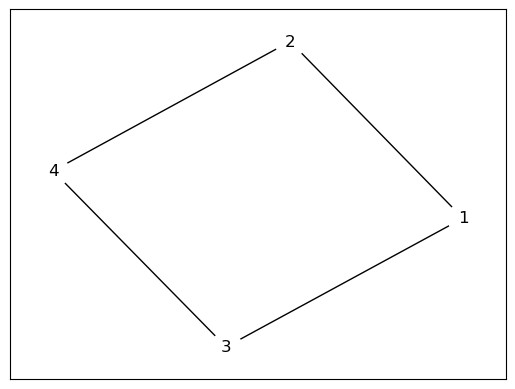

In [18]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
plot_graph(G)

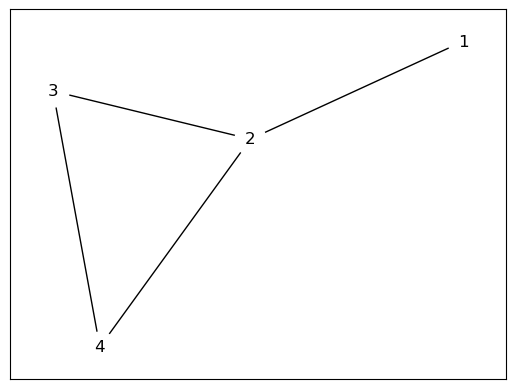

In [19]:
G = nx.Graph()
edges = [(1, 2), (2, 3), (2, 4), (3, 4)]
G.add_edges_from(edges) 
plot_graph(G)

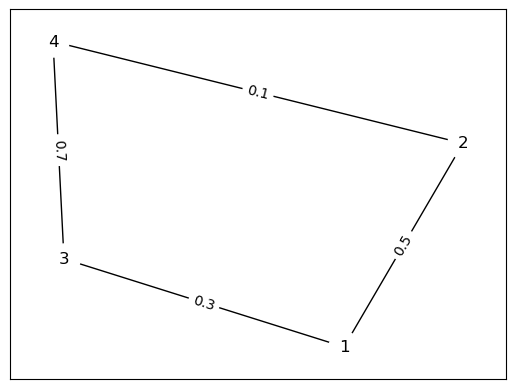

In [20]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)
plot_graph(G)

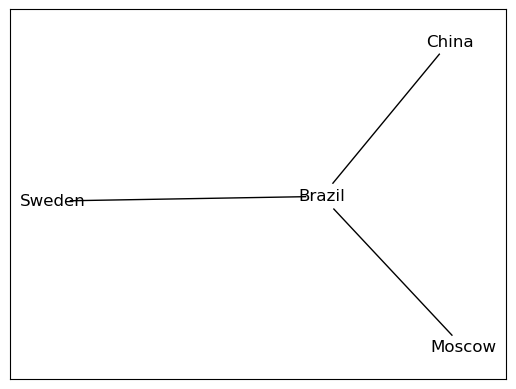

In [22]:
G = nx.Graph()
G.add_nodes_from([
    ("Moscow", dict(population=13.1)),
    ("Brazil", dict(population=5.6)),
    ("China", dict(population=1.3)),
    ("Sweden", dict(population=1.6)),
])

G.add_edge("Moscow", "Brazil", distance = 199)
G.add_edge("Brazil", "China", distance =816)
G.add_edge("Brazil", "Sweden", distance = 1900)
plot_graph(G)

In [23]:
len(G)

4

In [24]:
len(G.edges)

3

In [25]:
for e in G.edges:
    print(e)

('Moscow', 'Brazil')
('Brazil', 'China')
('Brazil', 'Sweden')


In [26]:
for e in G.edges.data("distance"):
    print(e)

('Moscow', 'Brazil', 199)
('Brazil', 'China', 816)
('Brazil', 'Sweden', 1900)


In [27]:
for n in G.neighbors("Moscow"):
    print(n)

Brazil


In [30]:
G = nx.Graph()
edges = [(1, 2, 0.5), (1, 3, 0.3), (2, 4, 0.1), (3, 4, 0.7)]
G.add_weighted_edges_from(edges)


nx.write_edgelist(G, "test_graph.edgelist")

In [31]:
##Упр 1 - Напишите функц, вычисл среднюю степень соседей для каждого из узлого, у которых впринципе есть соседи

In [34]:
def avg_neigh_degree(G) -> dict[Any, Any]:
    data = {}
    for n in G.nodes():
        if G.degree(n):
            data[n] = np.mean([G.degree(i) for i in G[n]])
    return data

In [35]:
G = nx.erdos_renyi_graph(n=10, p = 0.2)
avg_degrees = avg_neigh_degree(G)
print(avg_degrees)

{0: 3.3333333333333335, 1: 4.0, 2: 1.75, 3: 4.0, 4: 4.0, 5: 3.0, 6: 3.5, 7: 2.75, 8: 3.0, 9: 3.25}


In [36]:
##Упр 2

Text(0.5, 0, 'probabilty of edges')

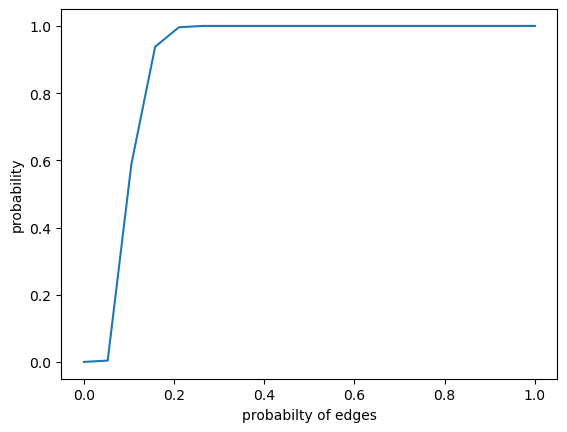

In [4]:
seto = np.linspace(0, 1, 20)
prob = list()

for m in seto:
    death_cases = 0
    for a in range(1000):
        G = nx.erdos_renyi_graph(n=40, p = m)
        if nx.number_connected_components(G) == 1:
            death_cases += 1
    prob.append(death_cases/1000)

plt.plot(seto,prob,label="Qubuic")
plt.ylabel("probability")
plt.xlabel("probabilty of edges")
     
    

In [7]:
def estimate_connectivity_probability(n, p, n_trials):
    is_connected = np.zeros((n_trials,), dtype=np.int_)
    for i in range(n_trials):
        G = nx.erdos_renyi_graph(n=n, p=p)
        is_connected[i] = nx.is_connected(G)
    return np.mean(is_connected)


def plot_percolation_curve(n):
    p = np.linspace(0,1,20)
    connectivity_probabilities = np.zeros_like(p, dtype=np.float_)
    n_trials = 1000
    for i in range(len(p)):
        connectivity_probabilities[i] = estimate_connectivity_probability(
            n=n,
            p=p[i],
            n_trials=n_trials
        )
    fig, ax = plt.subplots(1, 1, figsize =(6, 4))
    ax.plot(p, connectivity_probabilities, "o--")
    ax.set_xlabel(r"$p$", fontsize=12)
    ax.set_ylabel(r"$p_{perc}$", fontsize=12)
    fig.tight_layout()
    plt.show()

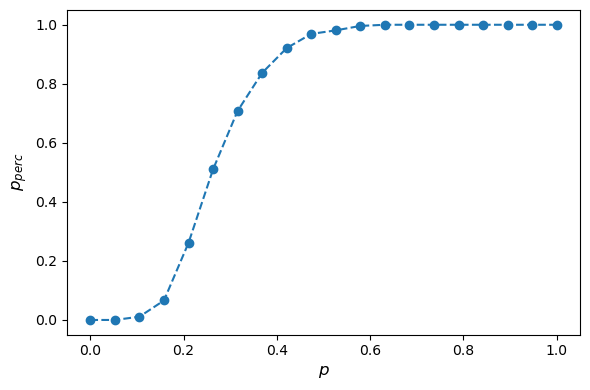

In [8]:
plot_percolation_curve(n=10)